In [1]:
from math import sin, cos, fsum
import numpy as np


def sin1x_integrand(b, ns):
    """
    Compute integrand values at nodes

    Parameters:
        b  - integration limit
        ns - nodes

    Returns:
        Integrand values
    """
    rb = 1.0 / abs(b)
    d = rb * rb + ns * ns
    return (cos(rb) + 2.0 * rb * sin(rb) * ns / d) / d


def integrate_sin1x_from0(b, ns, ws):
    """
    Compute int_0^b \sin(1/x) dx

    Parameters:
        b  - integration limit
        ns - Gauss-Laguerre nodes
        ws - Gauss-Laguerre weights

    Returns:
        Integral value
    """
    if b == 0.0:
        return 0.0
    else:
        return fsum(sin1x_integrand(b, ns) * ws)


def integrate_sin1x(a, b, deg=32):
    """
    Compute int_a^b \sin(1/x) dx

    Parameters:
        a   - left integration limit
        b   - right integration limit
        deg - Gauss-Laguerre quadrature degree

    Returns:
        Integral value
    """
    ns, ws = np.polynomial.laguerre.laggauss(deg)
    return integrate_sin1x_from0(b, ns, ws) - integrate_sin1x_from0(a, ns, ws)

In [2]:
a = 0
b = 0.001

integrate_sin1x(a, b, 128)

5.64031690782597e-07

In [3]:
from scipy.integrate import quad
quad(lambda x : sin(1.0 / x), a, b, limit=1000000)

(5.85139031596554e-07, 4.936575165647834e-09)

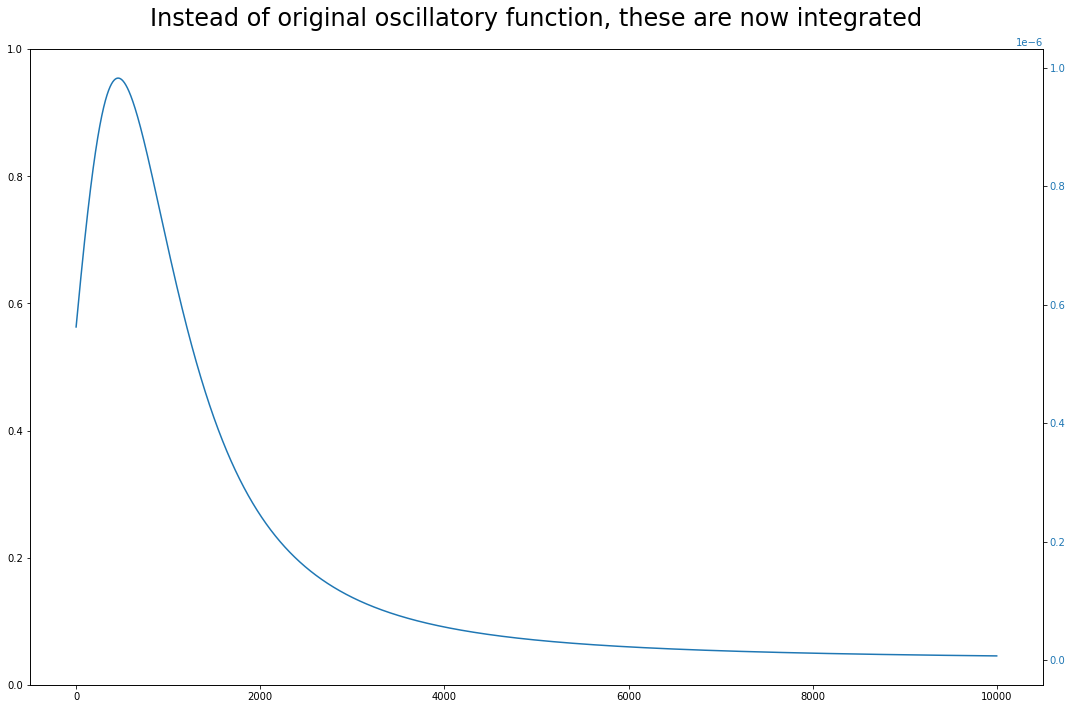

In [4]:
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]

x = np.arange(0.0, 10000.0, 1.0)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

if a != 0:
    ya = sin1x_integrand(a, x)
    ax1.plot(x, ya, color="tab:red")
    ax1.tick_params(axis='y', labelcolor="tab:red")

if b != 0:
    yb = sin1x_integrand(b, x)
    ax2.plot(x, yb, color="tab:blue")
    ax2.tick_params(axis='y', labelcolor="tab:blue")

fig.suptitle("Instead of original oscillatory function, these are now integrated", fontsize=24)
fig.tight_layout()